# Lending Club Case Study - Loan Default - Univariate and Bi-Variate Analysis

by Dr Renu L Rajani & Vijaykumar Kamma 

# Outline


1. Import Libraries and Carry Out Settings
2. Upload Loan Dataframe
3. Carry out data Cleansing
4. Create Derived Value Columns
5. Univariate Analysis
6. Bi-Variate Analysis
7. Conclusions

# 1. Import Libraries and Cary Out Settings

In [384]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns
import os

# Import Regular Expressions
import re

#set mode to None to remove Settings With Copy Warning
pd.options.mode.chained_assignment = None 

#setting to convert scientific notations to float
pd.options.display.float_format = '{:.4f}'.format 

# to display all the columns
pd.set_option('display.max_columns', 100) 
np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

# To ignore warnings due to version mismatches
import warnings
warnings.filterwarnings('ignore') 

# 2. Upload Loan Dataframe


In [385]:
#Upload Loan Database
loan = pd.read_csv('loan.csv',dtype='object')

#Check the Shape - Rows and Columns in the Loan dataframe 
loan.shape

(39717, 111)

In [386]:
#Check the loan dataframe header with all its columns (Setting has been done to display more columns in this large dataframe)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0,0,0,May-16,67.79,Jun-16,May-16

##### Finding: We have 111 columns with number of NaNs.  We would try to clean the dataframe to make it manageable for further analysis.

# 3. Carry out the Loan Dataframe Cleansing

#### Visualize the loan dataframe columns with null values. 

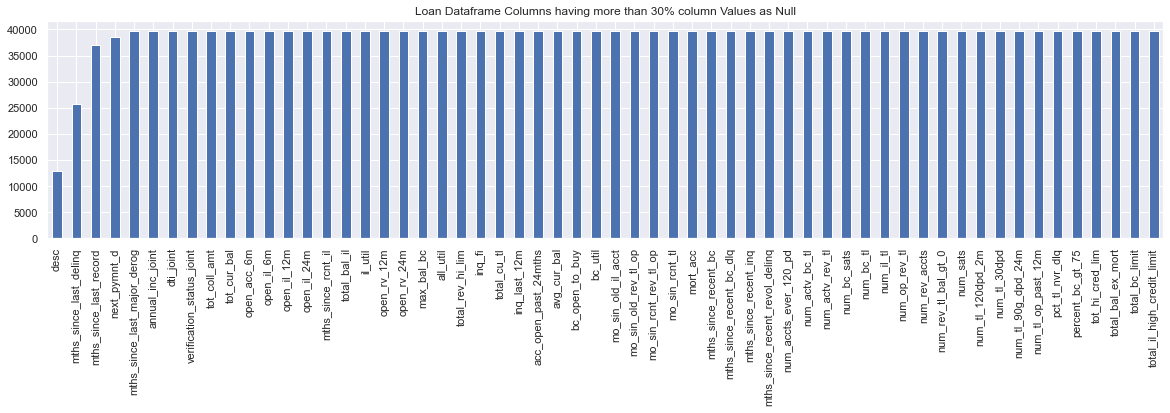

In [387]:
#We want to keep only columns where at least 30% of the column values are not null. 
#We would remove the columns whih have more than 30% values as nulls.

NA_col = loan.isnull().sum()
NA_col = NA_col[NA_col.values >(0.3*len(loan))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('Loan Dataframe Columns having more than 30% column Values as Null')
plt.show()

#### Define removeNull Function to Remove Null Values from columns and rows

In [388]:
# Now we will remove the columns having moire than 30% column values as Null.

#Lets first define a Function that handles Null Values
# The def removeNulls(dataframe, axis, percent) has following arguments 
    #dataframe (Name of dataframe), 
    #axis (0 for rows and 1 for columns), 
    #percent for the percent of data where row/column values are null.  We have set default value as 0.3 (30%)
    #the function returns the dataframe after removing rows and columns that have more than 30% of the values as Null.

    
def removeNulls(dataframe, axis =1, percent = 0.3):
    df = dataframe.copy()
    dshape = df.shape
    if axis == 0:
       rows = df.transpose().isnull().sum()
       rows = list(rownames[rownames.values > percent*len(df)].index)
       df.drop(df.index[rows],inplace=True)
       print("\n# of Rows Dropped\t: ",len(rows))
    else:
       cols = (df.isnull().sum()/len(df))
       cols = list(cols[cols.values>=percent].index)
       df.drop(labels = cols,axis =1,inplace=True)        
       print("# of Columns Dropped\t: ",len(cols))
        
    print("\nRows and Columns in Original Database",dshape,"\nRows and Columns in Loan Dataframe after applying removeNull Function ",df.shape)

    return df

#### Define removeNull Function to Remove Null Values from columns and rows

In [389]:
#Now we would apply this newly defined removeNulls function to our loan Dataframe

loan = removeNulls(loan, axis =1,percent = 0.3)

# of Columns Dropped	:  58

Rows and Columns in Original Database (39717, 111) 
Rows and Columns in Loan Dataframe after applying removeNull Function  (39717, 53)


##### Finding: 58 columns were dropped but no rows were dropped after applying removeNull Function. 

In [390]:
#Lets Check the Loan Dataframe head now
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1,0,Apr-99,5,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20,0,Feb-96,1,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0,0,0,May-16,67.79,May-16,0,1,INDIVIDUAL,0,0,0,0,0


In [391]:
#Lets Check Loan Dataframe Info now
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          39717 non-null  object
 1   member_id                   39717 non-null  object
 2   loan_amnt                   39717 non-null  object
 3   funded_amnt                 39717 non-null  object
 4   funded_amnt_inv             39717 non-null  object
 5   term                        39717 non-null  object
 6   int_rate                    39717 non-null  object
 7   installment                 39717 non-null  object
 8   grade                       39717 non-null  object
 9   sub_grade                   39717 non-null  object
 10  emp_title                   37258 non-null  object
 11  emp_length                  38642 non-null  object
 12  home_ownership              39717 non-null  object
 13  annual_inc                  39717 non-null  ob

Since our Objective is to cary out Univariate and Bi-Variate Analysis, we would keep that columns having 2 or more drop-down values.
We would remove the columns that have only single unique value in drop-downs. 

### Data Manipulation - Imputing, Substitutions, Converting Data Types ..

#### Remove Columns with only single values

In [392]:
#Here we define how to fihttp://localhost:8888/notebooks/Upgrad/Main/GroupCaseStudy/LoanDefault%20Analysis%20-%20Renu%20and%20Vijay.ipynb#Remove-Columns-with-only-single-valuesnd columns with only single unique value - e.g. column Pymnt_plan having single drop down value "n"
unique = loan.nunique()
unique = unique[unique.values == 1]

In [393]:
#We drop columns with only single unique value
loan.drop(labels = list(unique.index), axis =1, inplace=True)
print("# of Columns after removing Columns with single unique value: ",loan.shape)

# of Columns after removing Columns with single unique value:  (39717, 44)


##### Finding: We have reduced number of columns from 53 to 44. We have dropped 9 columns based on the columns carrying only single value, hence not useful for our analysis

In [394]:
#Lets Check the Loan Dataframe now
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1,0,Apr-99,5,3,0,1687,9.40%,4,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,May-16,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20,0,Feb-96,1,10,0,5598,21%,37,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0,0,0,May-16,67.79,May-16,0


In [395]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       39717 non-null  object
 1   member_id                39717 non-null  object
 2   loan_amnt                39717 non-null  object
 3   funded_amnt              39717 non-null  object
 4   funded_amnt_inv          39717 non-null  object
 5   term                     39717 non-null  object
 6   int_rate                 39717 non-null  object
 7   installment              39717 non-null  object
 8   grade                    39717 non-null  object
 9   sub_grade                39717 non-null  object
 10  emp_title                37258 non-null  object
 11  emp_length               38642 non-null  object
 12  home_ownership           39717 non-null  object
 13  annual_inc               39717 non-null  object
 14  verification_status      39717 non-nul

We now want to clean column values in this dataframe with 44 columns.

#### Replace nan values from Emp_length with zero (0)

In [396]:
#Lets Study values in Emp_length column

print(loan.emp_length.unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]


In [397]:
# We now replace nan with 0 and check unique values in emp_length

loan.emp_length.fillna('0',inplace=True)
print(loan.emp_length.unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' '0']


#### Remove columns not required for analysis - e.g. id, url, zipcode..

We want to further remove the columns we dont need- e.g. id, member_id. url, zip_code which are not going to be useful for our analysis.

In [398]:
# We define not_required_columns as columns we dont need
not_required_columns = ["id","member_id","url","zip_code"]

# We now drop the columns that are not required. 
loan.drop(labels = not_required_columns, axis =1, inplace=True)
print("# of Rows and Columns after removing Not required Columns: ",loan.shape ,"rows & columns.")

# of Rows and Columns after removing Not required Columns:  (39717, 40) rows & columns.


#### convert int_rate column to float

interest rate column should be a float value, but is having a % at the end.
We would remove % and convert string to float.

In [399]:
#Remove % at the end of int_rate
loan["int_rate"] = loan["int_rate"].apply(lambda x:str(x[:-1])) 

#COnvert int_rate column from string to float
loan["int_rate"] = loan["int_rate"].apply(lambda x:float(x))                                       
 
#Resetting the index
loan= loan.reset_index(drop=True)

#Now Lets check the Shape of the loan dataframe
print("Current shape of Loan Dataframe is :", loan.shape)

Current shape of Loan Dataframe is : (39717, 40)


In [400]:
#Lets check the Loan Dataframe Info now
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  object 
 1   funded_amnt              39717 non-null  object 
 2   funded_amnt_inv          39717 non-null  object 
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  float64
 5   installment              39717 non-null  object 
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_title                37258 non-null  object 
 9   emp_length               39717 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  object 
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

#####  Finding: We note that except for int_rate column which is shown in float (we just converted it to float), all others are reflecting as object

In order to treat the numeric columns as numeric, we convert the required numeric fields - loan_amnt, funded_amnt, funded_amnt_inv, installment, annual_inc, dti to numeric.

In [401]:
#Lets convert numeric columns shown as String to Numeric.
# We do it by applying to_numeric function.

numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti']
loan[numeric_columns] = loan[numeric_columns].apply(pd.to_numeric)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0000,36 months,10.6500,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.6500,0,Jan-85,1,3,0,13648,83.70%,9,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0
1,2500,2500,2500.0000,60 months,15.2700,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Source Verified,Dec-11,Charged Off,car,bike,GA,1.0000,0,Apr-99,5,3,0,1687,9.40%,4,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0
2,2400,2400,2400.0000,36 months,15.9600,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.7200,0,Nov-01,2,2,0,2956,98.50%,10,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,May-16,0
3,10000,10000,10000.0000,36 months,13.4900,339.3100,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0000,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.0000,0,Feb-96,1,10,0,5598,21%,37,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,0
4,3000,3000,3000.0000,60 months,12.6900,67.7900,B,B5,University Medical Group,1 year,RENT,80000.0000,Source Verified,Dec-11,Current,other,Personal,OR,17.9400,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0,0,0,May-16,67.79,May-16,0


#### Analyze purpose column and remove rows for fewer loan records for a purpose

In [402]:
#Now lets study various purposes for which people take loan. We report here % of instances of loan sanction by purpose.  

(loan.purpose.value_counts()*100)/len(loan)

debt_consolidation   46.9346
credit_card          12.9164
other                10.0536
home_improvement      7.4930
major_purchase        5.5065
small_business        4.6026
car                   3.9001
wedding               2.3844
medical               1.7448
moving                1.4679
vacation              0.9593
house                 0.9593
educational           0.8183
renewable_energy      0.2593
Name: purpose, dtype: float64

##### Finding: Debt Consolidation as the topmost purpose (46.93%) for taking loan, and various others in descending order.

In [403]:
#We want to remove the records taht have loan purpose with less than 0.5% of loan instances.  
#So renewable_energy purpose related records would be removed.

del_loan_purpose = (loan.purpose.value_counts()*100)/len(loan)
del_loan_purpose = del_loan_purpose[(del_loan_purpose < 0.50)]

loan.drop(labels = loan[loan.purpose.isin(del_loan_purpose.index)].index, inplace=True)

print("# of Rows and Columns after removing loan records with <0.5% as purpose",loan.shape ,"rows & columns.")

print(loan.purpose.unique())

# of Rows and Columns after removing loan records with <0.5% as purpose (39614, 40) rows & columns.
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'educational']


#### Analyze loan_status Column

In [404]:
#Lets Study the Loan Status Field and values

(loan.loan_status.value_counts()*100)/len(loan)

Fully Paid    82.9681
Charged Off   14.1566
Current        2.8752
Name: loan_status, dtype: float64

##### Finding: Loan_status is Fully_paid in 82.96% cases, Charged Off in 14.15% cases and Current in 2,87% cases. 

#### Analyze annual_inc column and remove rows with extreme values

In [405]:
#Lets analyze the annual_inc column

loan["annual_inc"].describe()

count     39614.0000
mean      68946.7708
std       63737.1368
min        4000.0000
25%       40500.0000
50%       59000.0000
75%       82275.5000
max     6000000.0000
Name: annual_inc, dtype: float64

##### Finding: maximum annual_inc is way above the 75th percentile. We decide to limit the records with annual_inc values within 95th percentile.

In [406]:
#Dropping the records with annual_inc above 95th percentile.
q = loan["annual_inc"].quantile(0.995)
loan = loan[loan["annual_inc"] < q]

In [407]:
#Lets now check the annualinc with describe function.
loan["annual_inc"].describe()

count    39393.0000
mean     66375.6869
std      37404.8536
min       4000.0000
25%      40040.0000
50%      58752.0000
75%      81996.0000
max     294000.0000
Name: annual_inc, dtype: float64

#### Analyze State-Wise Loans Extended

In [408]:
#Count the number of Loans by addr_state
loan.addr_state.value_counts()

CA    7049
NY    3778
FL    2838
TX    2699
NJ    1832
PA    1511
IL    1510
VA    1396
GA    1388
MA    1326
OH    1220
MD    1036
AZ     870
WA     836
CO     783
NC     781
CT     740
MI     710
MO     677
MN     612
NV     492
SC     470
WI     459
OR     449
AL     448
LA     429
KY     324
OK     299
KS     270
UT     256
AR     245
DC     214
RI     196
NM     186
WV     177
HI     174
NH     170
DE     114
MT      85
WY      83
AK      79
SD      64
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

In [409]:
#List the States that have less than 10 loans.  Some States have very few loans, we would drop those.
filter_states = loan.addr_state.value_counts()
filter_states = filter_states[(filter_states < 10)]
filter_states.value_counts()

5    2
6    1
3    1
9    1
Name: addr_state, dtype: int64

In [410]:
#Drop the records for states that have less than 10 loans
loan = loan.drop(labels = loan[loan.addr_state.isin(filter_states.index)].index)

In [411]:
#Lets now check the shape of loan dataframe
loan.shape

(39365, 40)

#### Analyze home_ownership column and remove the rows with Other/None values

Lets Study home_ownership column

In [412]:
#Find Unique values in home_ownership column
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

While Rent, Own, Mortgage are valid ownership types, it is difficult to understand and analyze on "Other", "None" 

In [413]:
# We drop the rows with home_ownership'=='OTHER', 'NONE', 'ANY'
rem = ['OTHER', 'NONE', 'ANY']
loan.drop(loan[loan['home_ownership'].isin(rem)].index,inplace=True)

In [414]:
#We now find Unique values in home_ownership column again
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

Now we find that all the records are converted to Rent/Own/Mortgage home_ownership type.

In [415]:
#Lets now check the shape of loan dataframe again
loan.shape

(39265, 40)

##### Finding: We are now left with 39265 rows and 4 columns in this Cleaned Loan Dataframe to analyze further.  We had started out with 39717 rows and 111 columns.

# 4. Create Derived Value Columns

#### Create a Column with Loan Amount to Annual Income Ratio 

In [416]:
#Create a new column loan_income_ratio = loan_amnt/annual_inc

loan['loan_income_ratio']= loan['loan_amnt']/loan['annual_inc']

#### Separate Month, Column from issue_d

In [417]:
#We have issue date issue_d listed as month-year, we want to have month and year as separate columns.

#Create issue_month, issue_year columns
loan['issue_month'],loan['issue_year'] = loan['issue_d'].str.split('-', 1).str

#list the head of newly created issue_month and issue_year column agaist original issue_d column
loan[['issue_d','issue_month','issue_year']].head()

,issue_d,issue_month,issue_year
0,Dec-11,Dec,11
1,Dec-11,Dec,11
2,Dec-11,Dec,11
3,Dec-11,Dec,11
4,Dec-11,Dec,11


In [418]:
#We see that months are ordered in Alphabetical as the issue_d field was string.  We want to order the months Jan-Dec.

months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

# We would now convert issue_month in a categorical field using pd.Categorical function
loan['issue_month'] = pd.Categorical(loan['issue_month'],categories=months_order, ordered=True)

#### Convert contnuous variable - loan_amnt to categorical with bins

We see loan_amnt is a continuous variable.  We want to convert it into a categorical field with bin values.

In [419]:
#Lets define the bins for Loan_amnt column
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]

#We now name the slots for these bin ranges
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']

#We now create a new derived column loan_amnt_range using the loan_amnt column and applying pd.cut function using the defined bins
loan['funded_amnt_range'] = pd.cut(loan['funded_amnt_inv'], bins, labels=slot)

#### Convert contnuous variable - annual_inc to categorical with bins

We see annual_inc is a continuous variable.  We want to convert it into a categorical field with bin values.

In [420]:
#Lets define the bins for annual_inc column
bins_inc = [0, 25000, 50000, 75000, 100000,1000000]

#We now name the slots for these bin ranges
slot_inc = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']

#We now create a new derived column annual_inc_range using the annual_inc column and applying pd.cut function using the defined bins
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins_inc, labels=slot_inc)

#### Convert contnuous variable - int_rate to categorical with bins

We see int_rate is a continuous variable.  We want to convert it into a categorical field with bin values.

In [421]:
#Lets define the bins for int_rate column
bins_int = [0, 7.5, 10, 12.5, 15,20]

#We now name the slots for these bin ranges
slot_int = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']

#We now create a new derived column int_rate_range using the int_rate column and applying pd.cut function using the defined bins
loan['int_rate_range'] = pd.cut(loan['int_rate'], bins_int, labels=slot_int)

In [422]:
#Now lets check the loan dataframe along with these newly created columns.
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_income_ratio,issue_month,issue_year,funded_amnt_range,annual_inc_range,int_rate_range
0,5000,5000,4975.0000,36 months,10.6500,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.6500,0,Jan-85,1,3,0,13648,83.70%,9,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0,0.2083,Dec,11,0-5000,0-25000,10-12.5
1,2500,2500,2500.0000,60 months,15.2700,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Source Verified,Dec-11,Charged Off,car,bike,GA,1.0000,0,Apr-99,5,3,0,1687,9.40%,4,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0,0.0833,Dec,11,0-5000,25000-50000,15 and above
2,2400,2400,2400.0000,36 months,15.9600,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.7200,0,Nov-01,2,2,0,2956,98.50%,10,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,May-16,0,0.1959,Dec,11,0-5000,0-25000,15 and above
3,10000,10000,10000.0000,36 months,13.4900,339.3100,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0000,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.0000,0,Feb-96,1,10,0,5598,21%,37,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,0,0.2033,Dec,11,5000-10000,25000-50000,12.5-15
4,3000,3000,3000.0000,60 months,12.6900,67.7900,B,B5,University Medical Group,1 year,RENT,80000.0000,Source Verified,Dec-11,Current,other,Personal,OR,17.9400,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0,0,0,May-16,67.79,May-16,0,0.0375,Dec,11,0-5000,75000-100000,12.5-15


In [423]:
loan=loan[loan['loan_status'].isin(['Charged Off','Fully Paid'])]

In [424]:
loan.shape

(38131, 46)

##### Finding: We have added 6 derived fields in loan dataframe -loan_income_ratio, issue_month, issue_year, loan_amnt_range, annual_inc_range, int_rate_range.  Total number of columns is 46. 
##### We are droping the loans having status as Current because, these candidates are not labelled as 'defaulted' 

# 5. Univariate and Segmented Univariate Analysis

We would like to cary out univariate analysis on loan_amnt_range, annual_inc_range, int_rate_range, loan_status, home_ownership, purpose, year.

For this we would first define a function Univariate that returns distribution plot, Violin Plot, and Box Plot for the analyzed variable.

### Define Univariate Function

In [425]:
#Lets first Define Function Univariate.
#By doing so the analysis returned by this function can be applied without repeating the steps across multiple variables.

#This function Univariate(df,col,vartype,hue) has attributes as below:
    #df: dataframe name
    #col:Name of Column to carry out univariate analysis on
    #vartype: whether the column is of continuous or categorical type.  
        #For continuous variable type, distribution, violin, boxplots will be plotted.
        #For categorical count plot would be plotted

def univariate(df,col,vartype,hue =None):
    sns.set(style="darkgrid")
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
             ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

### Apply the Univariate Function to cary out Univariate Analysis on Multiple Columns

#### Univariate Analysis on loan_amnt and loan_amnt_range

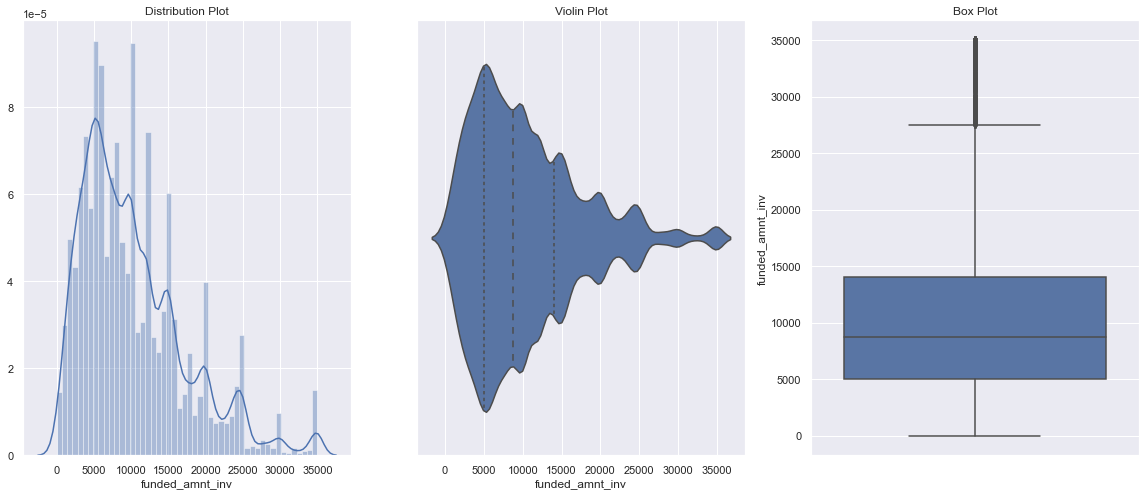

In [426]:
#Lets carry out Univariate analysis on loan_amnt
univariate(df=loan,col='funded_amnt_inv',vartype=0)

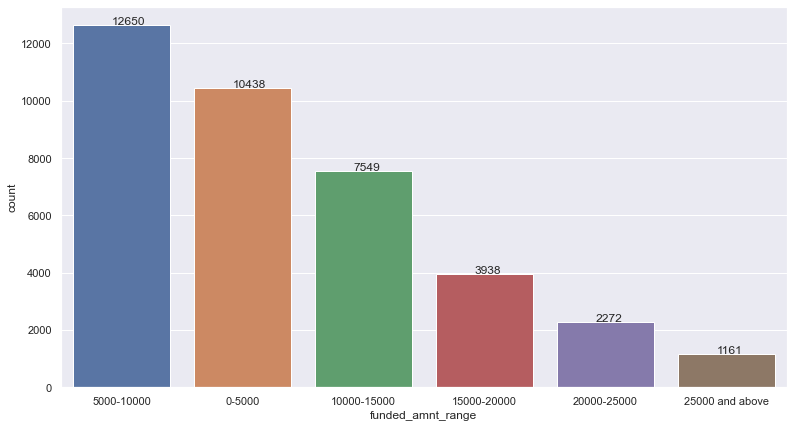

In [427]:
#Lets carry out Univariate analysis on loan_amnt_range
univariate(df=loan,col='funded_amnt_range',vartype=1)

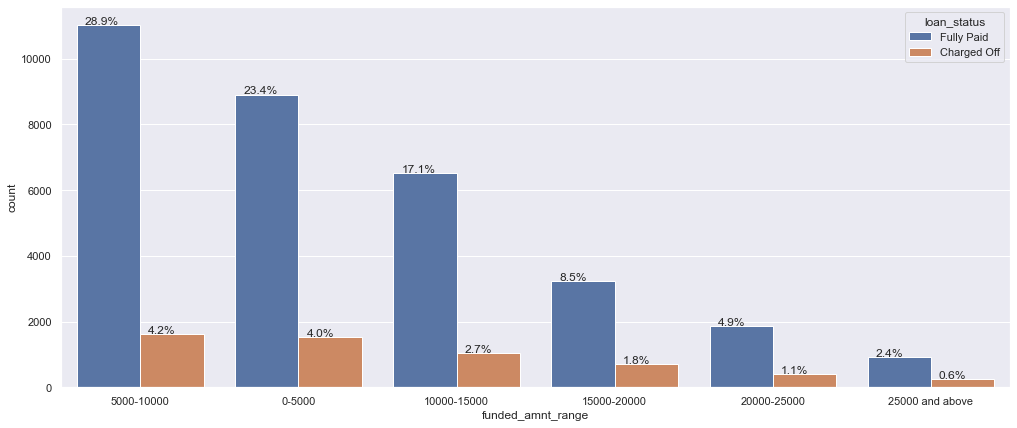

In [428]:
#Lets carry out Univariate analysis on loan_amnt_range
univariate(df=loan,col='funded_amnt_range',vartype=1, hue = 'loan_status')

##### Finding: The largest number of loans (12650 out of 38131, 32.8%) are in the range of USD 5000-10000.

#### Univariate Analysis on int_rate and int_rate_range

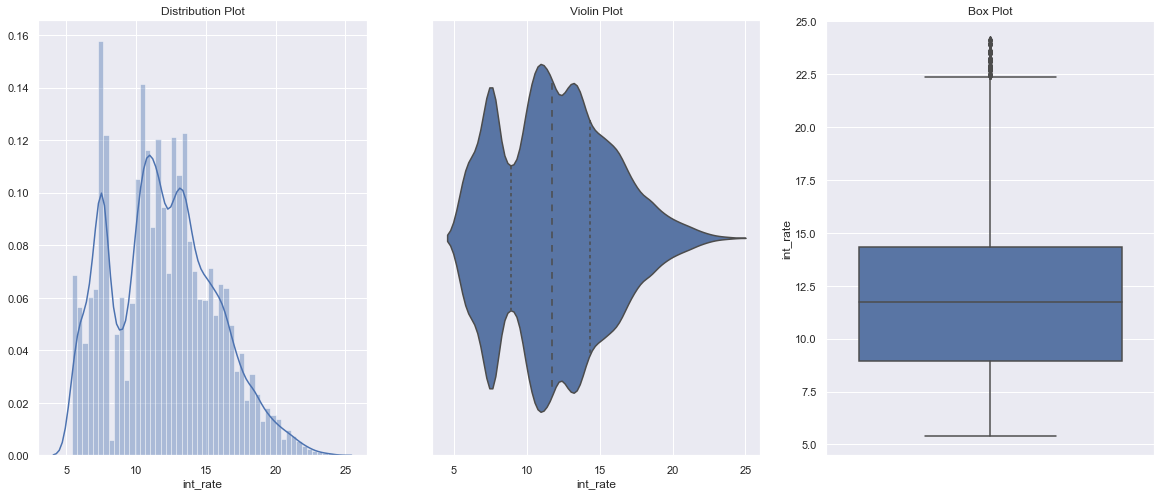

In [429]:
#Lets carry out Univariate analysis on int_rate
univariate(df=loan,col='int_rate',vartype=0)

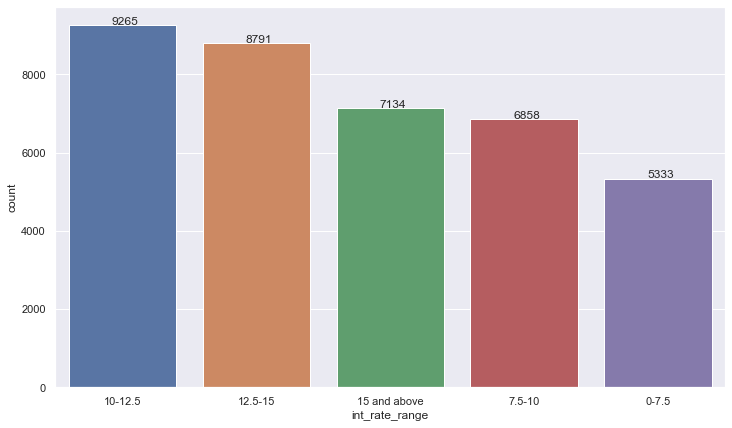

In [430]:
#Lets carry out Univariate analysis on int_rate_range
univariate(df=loan,col='int_rate_range',vartype=1)

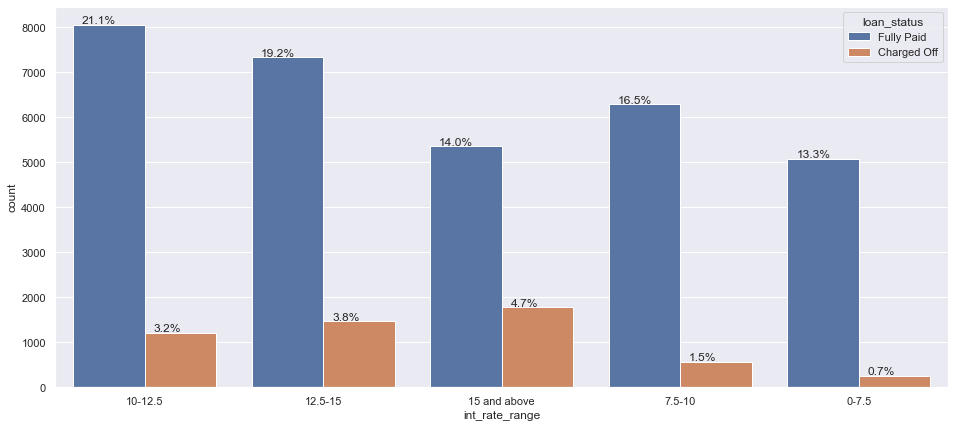

In [431]:
#Lets carry out Univariate analysis on int_rate_range
univariate(df=loan,col='int_rate_range',vartype=1, hue = 'loan_status')

##### Finding: The largest number of loans (9265 out of total 38131 loans, 24.3%) are in the interest rate bracket of 10-12.5 percent.  The percentage defaulters are the highest in interest rate range of 15% and above.


#### Univariate Analysis on annual_inc and annual_inc_range

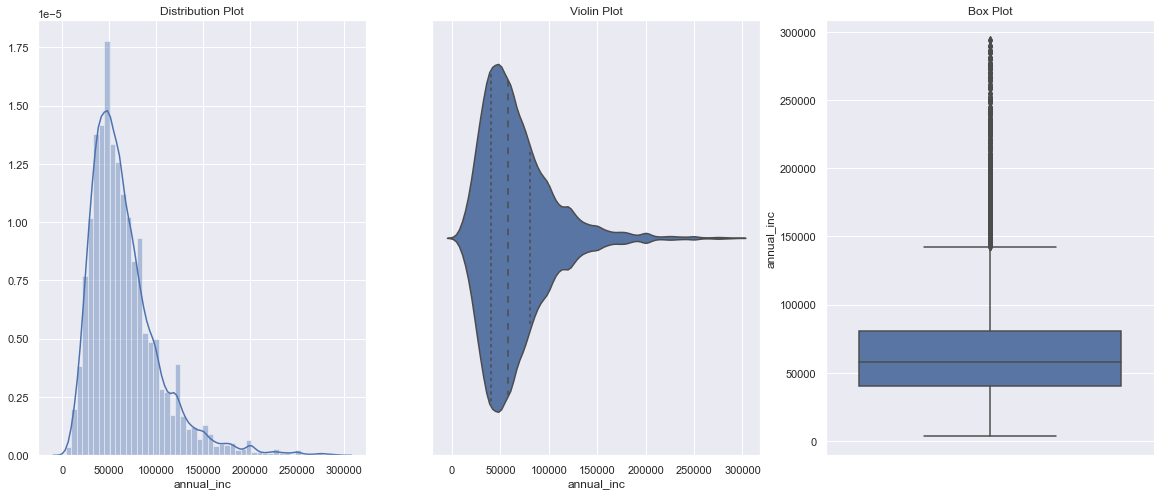

In [432]:
#Lets carry out Univariate analysis on int_rate_range
univariate(df=loan,col='annual_inc',vartype=0)

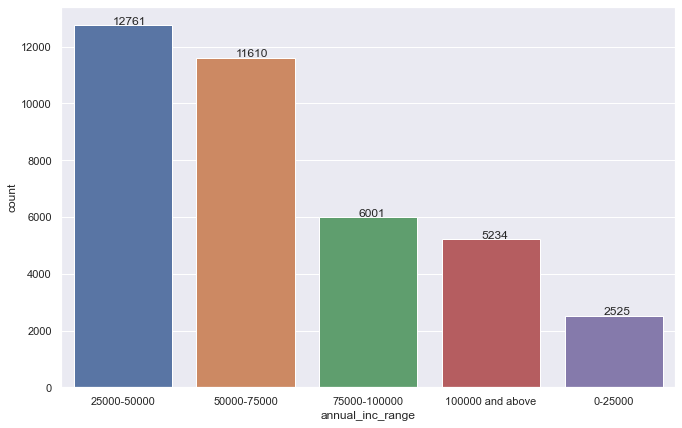

In [433]:
#Lets carry out Univariate analysis on annual_inc_range
univariate(df=loan,col='annual_inc_range',vartype=1)

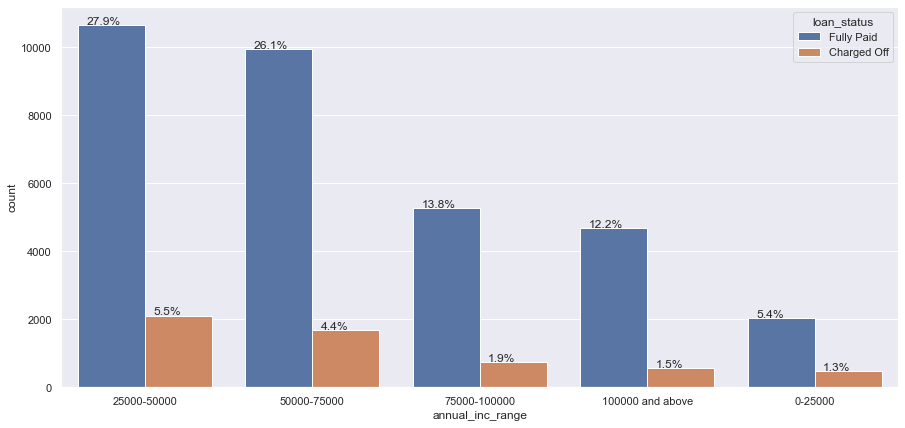

In [434]:
#Lets carry out Univariate analysis on annual_inc_range
univariate(df=loan,col='annual_inc_range',vartype=1, hue = 'loan_status')

##### Finding: The largest number of loans (12761 out of total 38131 loans, 33.3%) are extended to people with USD25000-50000 annual income bracket. The largest % defaulters 5.5% also belong to this bracket.  

#### Univariate Analysis on Loan Status

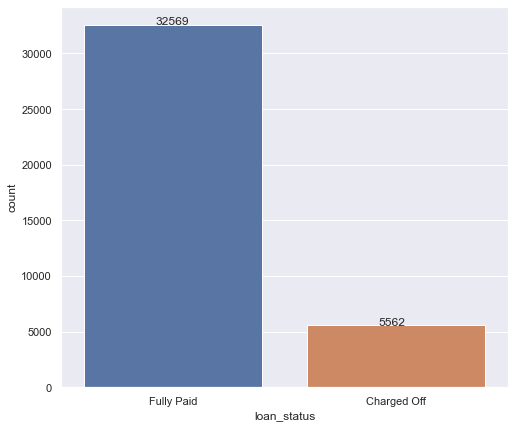

In [435]:
#Lets carry out Univariate analysis on loan_status
univariate(df=loan,col='loan_status',vartype=1)

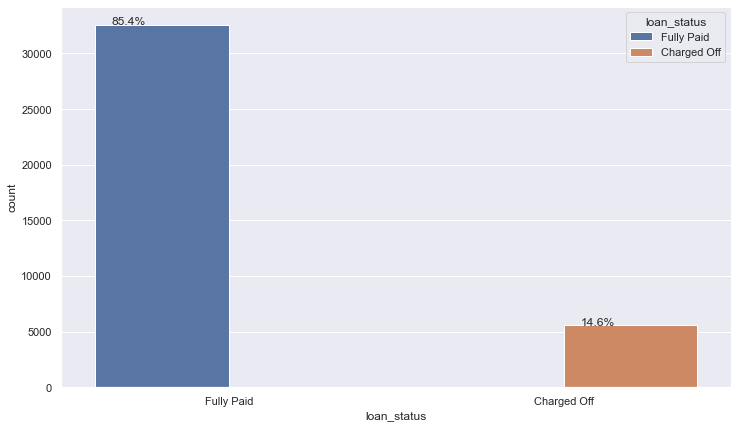

In [436]:
#Lets carry out Univariate analysis on loan_status
univariate(df=loan,col='loan_status',vartype=1, hue = 'loan_status')

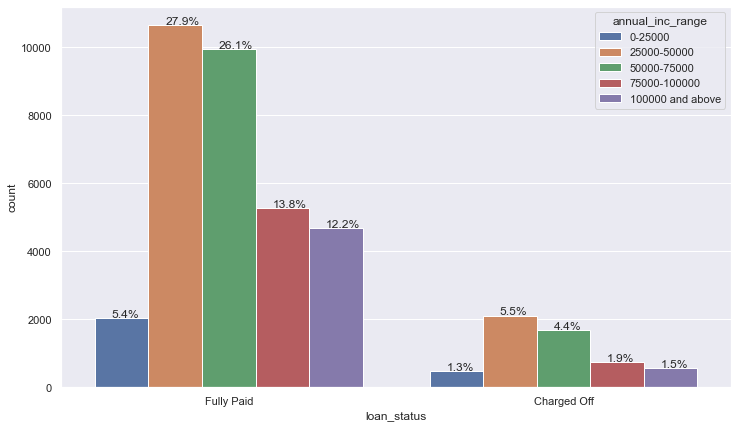

In [437]:
#Lets carry out Univariate analysis on loan_status
univariate(df=loan,col='loan_status',vartype=1, hue = 'annual_inc_range')

##### Finding: 32569 out of 38131 loans (85.4%) are fully paid, 5562 (14.6%) are charged_off . Charged_off cases (5.4%) are the highest in annual_inc_range of  USD25000-50000.

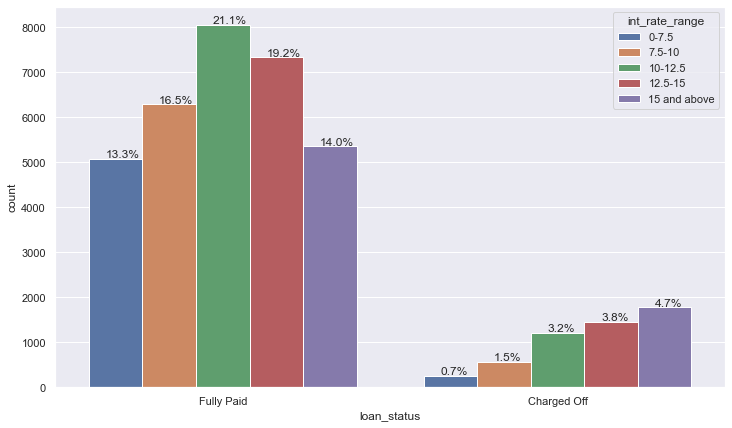

In [438]:
#Lets carry out Univariate analysis on loan_status and int_rate_range
univariate(df=loan,col='loan_status',vartype=1, hue = 'int_rate_range')

##### Finding: Charged_off cases (4.5%) are the highest in the interest rate range of 15% and above.

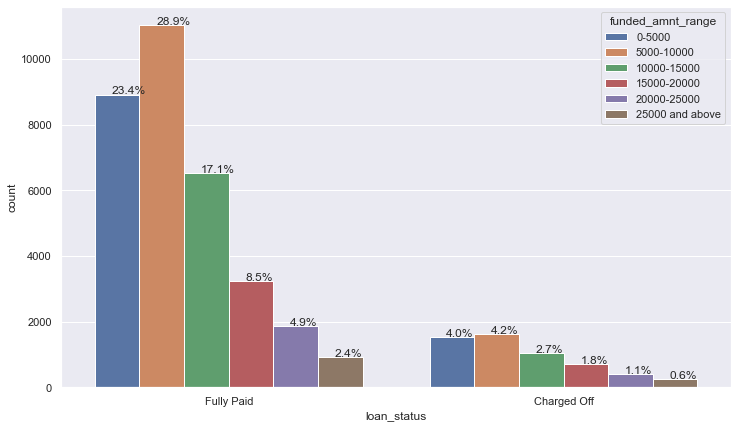

In [439]:
#Lets carry out Univariate analysis on loan_status and loan_amnt_range
univariate(df=loan,col='loan_status',vartype=1, hue = 'funded_amnt_range')

##### Finding: Largest category of loans is to loan_amt_range USD5000-10000, and the highest incidence of default is also among this group (4.2% of overall loans)

#### Univariate Analysis on Loan Purpose

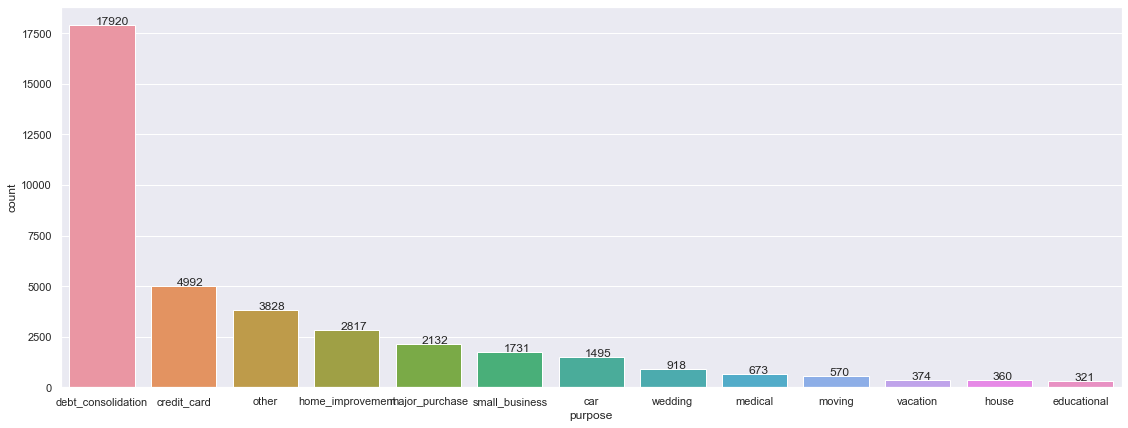

In [440]:
#Lets carry out Univariate analysis on loan_status
univariate(df=loan,col='purpose',vartype=1)

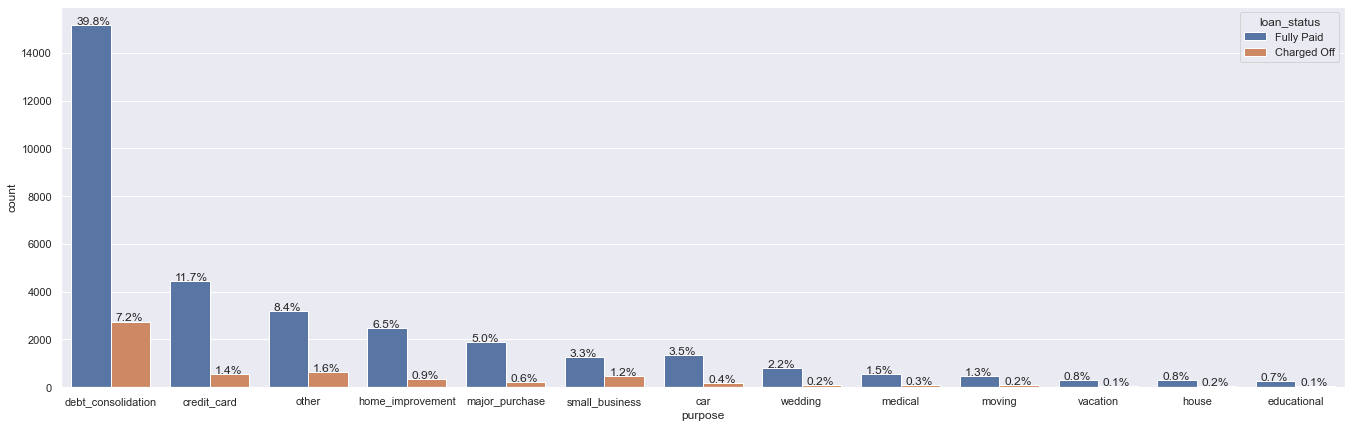

In [441]:
#Lets carry out Univariate analysis on loan_status
univariate(df=loan,col='purpose',vartype=1,hue='loan_status')

##### Finding: Debt Consolidation emerges as topmost purpose for taking loan and appears are topmost category for charged_off loans. 

#### Univariate Analysis on home_ownership

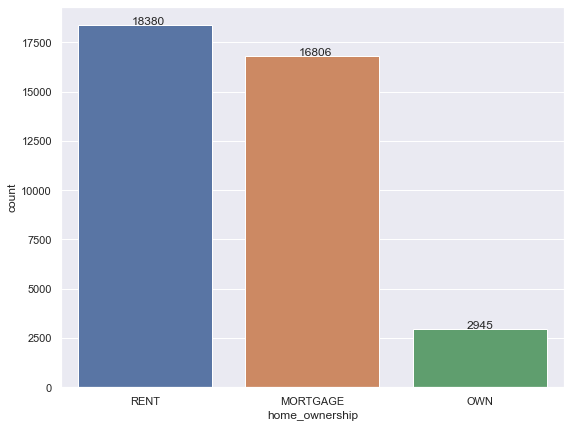

In [442]:
#Lets carry out Univariate analysis on home_ownership
univariate(df=loan,col='home_ownership',vartype=1)

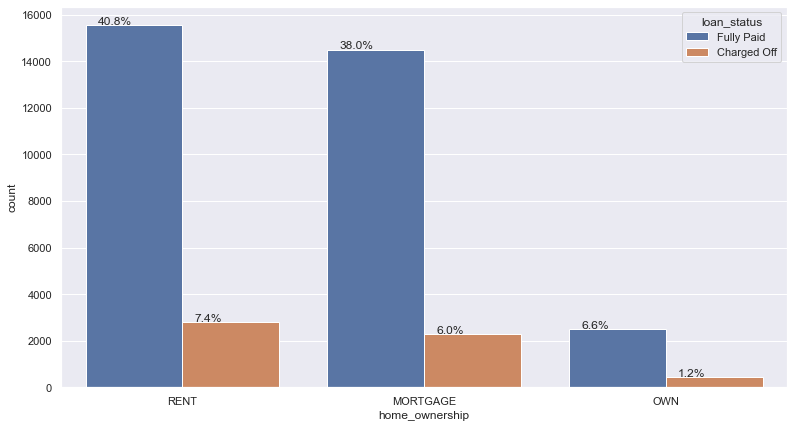

In [443]:
#Lets carry out Univariate analysis on home_ownership
univariate(df=loan,col='home_ownership',vartype=1,hue='loan_status')

##### Finding: The highest instances of loans issued (18380 out of 38131, 40.8%) are to people with home_ownership as "Rent".  The default (7.4% of all loans) is also the highest in this group.  

#### Univariate Analysis by Year

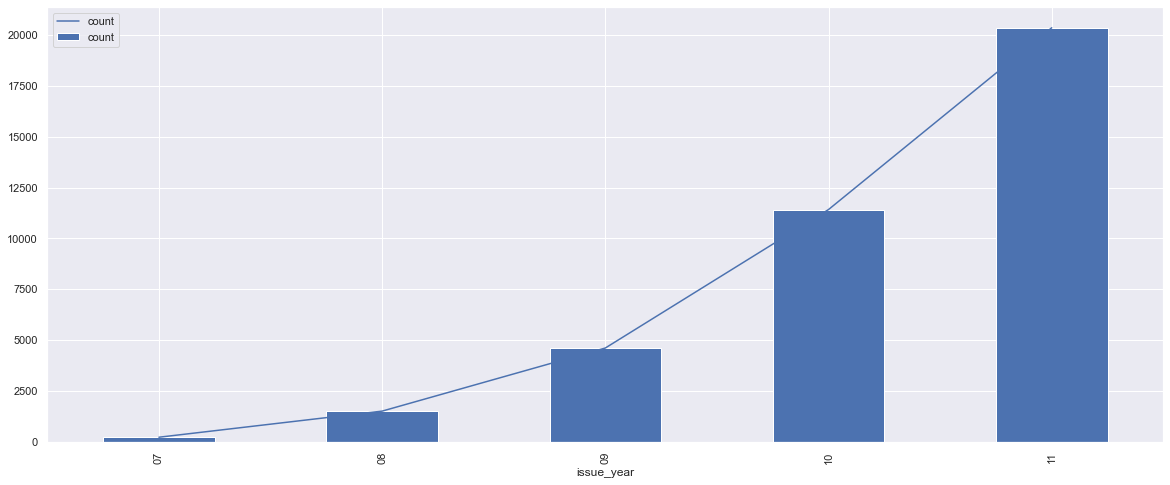

In [444]:
#Analyze overall loans issued (count) by year and trending 
year_wise =loan.groupby(by= [loan.issue_year])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

##### The chart above shows number of loans extended by the year analyzed in this exercise.

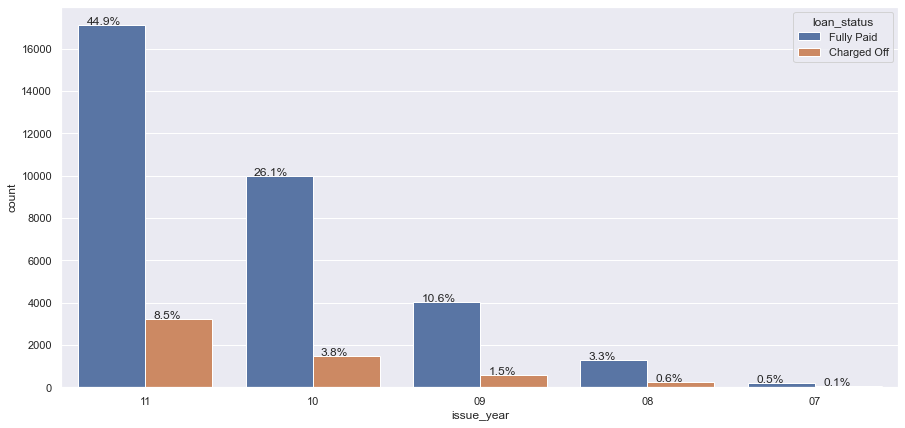

In [445]:
#Lets carry out Univariate analysis on issue_year
univariate(df=loan,col='issue_year',vartype=1,hue='loan_status')

##### Finding: The charged_off percentage has gone up in year 2011.  

#### Loan Status by Loan Term

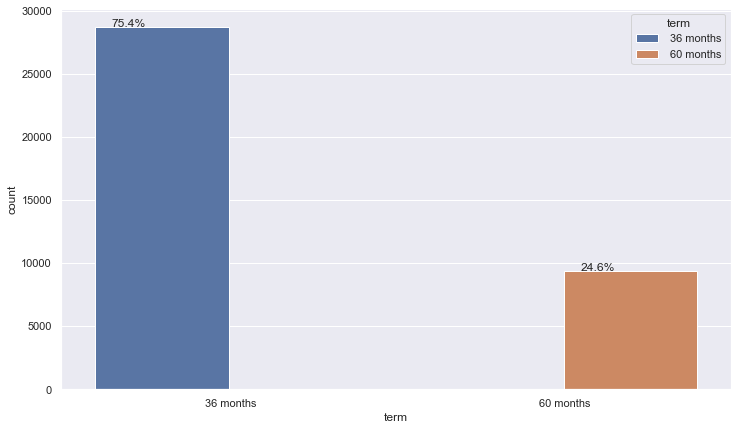

In [446]:
#Lets carry out Univariate analysis on Loan Term
univariate(df=loan,col='term',vartype=1,hue='term')

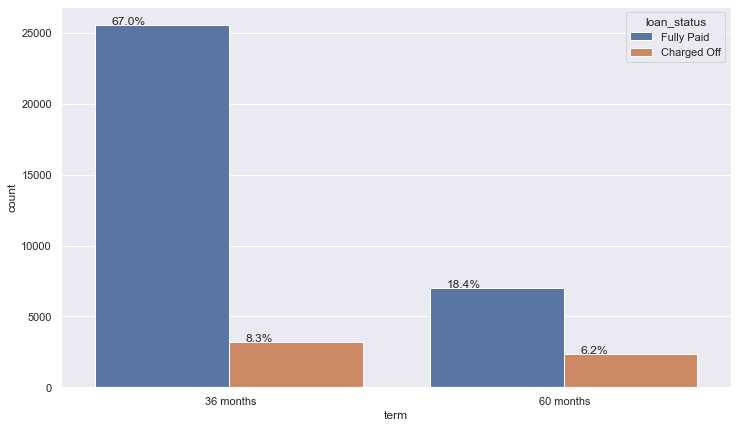

In [447]:
#Lets carry out Univariate analysis on Loan Term
univariate(df=loan,col='term',vartype=1,hue='loan_status')

##### Finding: 75.4% loans are extended for 36 months.  The charged-off proportion is higher for 60 month tenure.

#### Loan Status by Issued Month

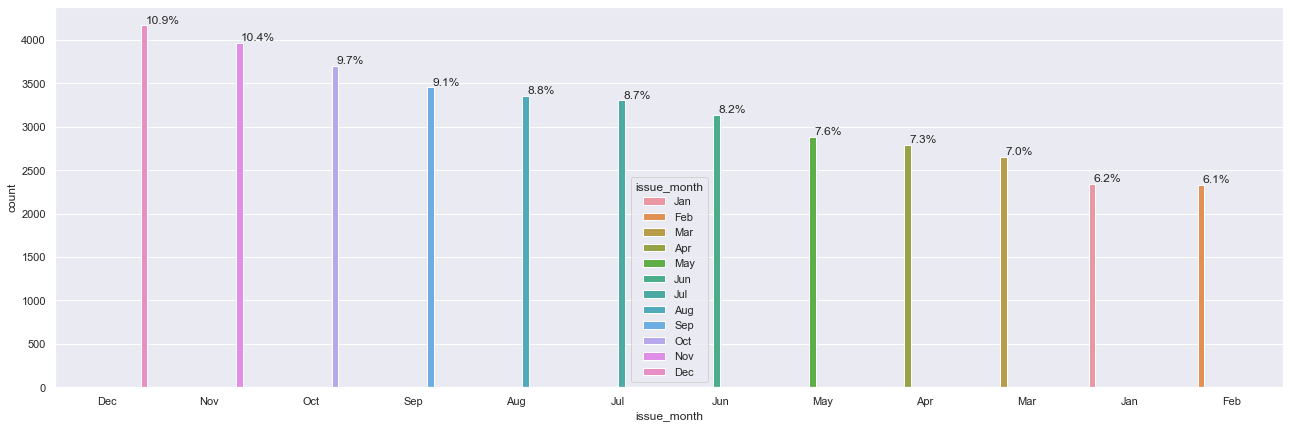

In [448]:
#Lets carry out Univariate analysis on Loan Issued Month
univariate(df=loan,col='issue_month',vartype=1,hue='issue_month')

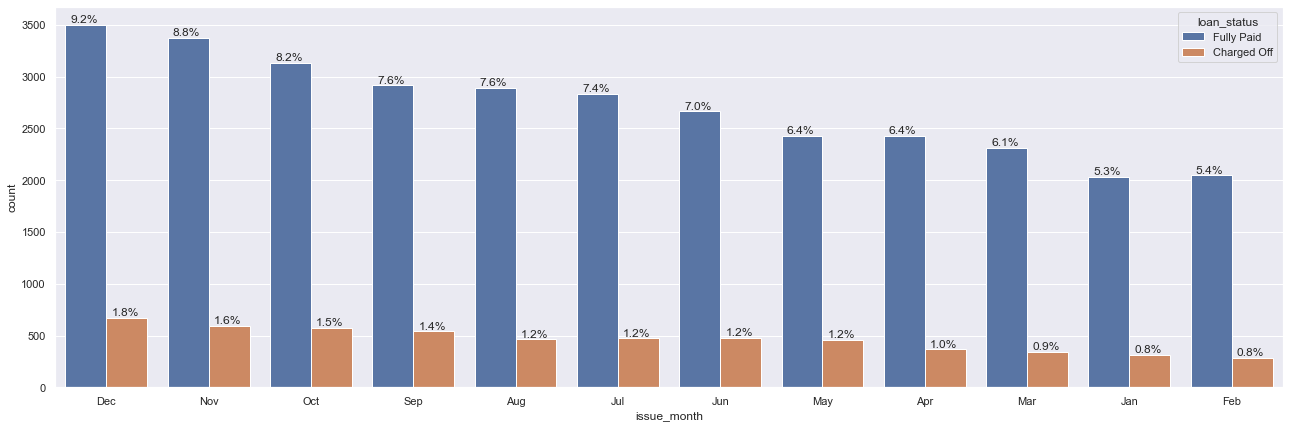

In [449]:
#Lets carry out Univariate analysis on Loan Issued Month
univariate(df=loan,col='issue_month',vartype=1,hue='loan_status')

##### Finding: Most of the loans(10.9%) are issued in the month of December, The default (1.8%% of all loans) is also the highest in this December month loans.

## Correlation Analysis

In [450]:
#Lets check correlation among numeric values
loan.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,loan_income_ratio
loan_amnt,1.0000,0.9819,0.9389,0.2996,0.9320,0.4169,0.0679,0.6165
funded_amnt,0.9819,1.0000,0.9569,0.3038,0.9577,0.4127,0.0676,0.6045
funded_amnt_inv,0.9389,0.9569,1.0000,0.2965,0.9060,0.3948,0.0756,0.5748
int_rate,0.2996,0.3038,0.2965,1.0000,0.2760,0.0700,0.1130,0.2123
installment,0.9320,0.9577,0.9060,0.2760,1.0000,0.4155,0.0576,0.5575
annual_inc,0.4169,0.4127,0.3948,0.0700,0.4155,1.0000,-0.1173,-0.3123
dti,0.0679,0.0676,0.0756,0.1130,0.0576,-0.1173,1.0000,0.1372
loan_income_ratio,0.6165,0.6045,0.5748,0.2123,0.5575,-0.3123,0.1372,1.0000


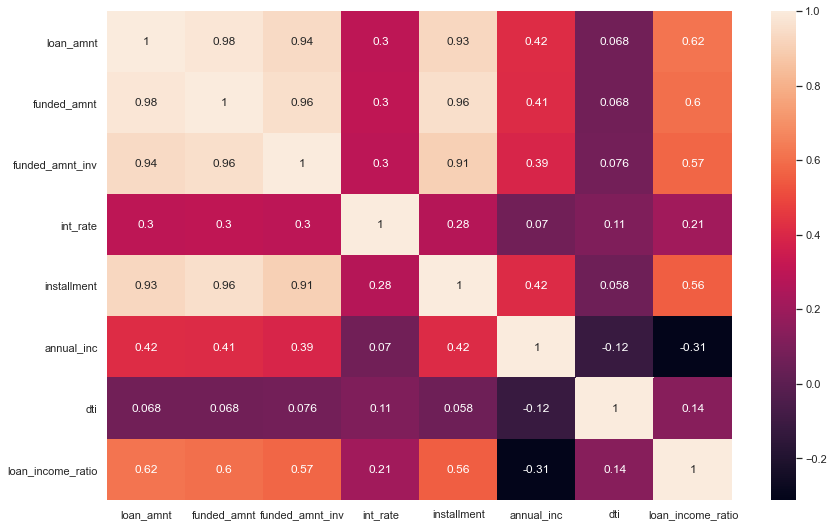

In [451]:
#Lets do a heatplot to visualize correlations of numeric values

loan_correlation = loan.corr()
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

##### Finding: The cells in lighter colors display higher correlated variables.

Loan_Amnt, Funded_amnt, funded_amnt_inv, and installment amount are highly correlated.  We kep our analysis to Loan_amnt and not for other variables therefore. 


annual_income and loan_income_ratio are negatively correlated

# Bi-Variate Analysis and Predicting Loan Default 

In [452]:
#Lets create a pivot table for Loan Status "Charged Off" based on purpose, emp-length, loan_amnt.  
#We would use this dataframe of charged_off loans for the cross-tabs/bi-variate analysis.

loanstatus=loan.pivot_table(index=['loan_status','purpose','emp_length'],values='funded_amnt_inv',aggfunc=('count')).reset_index()
loanstatus=loan.loc[loan['loan_status']=='Charged Off']

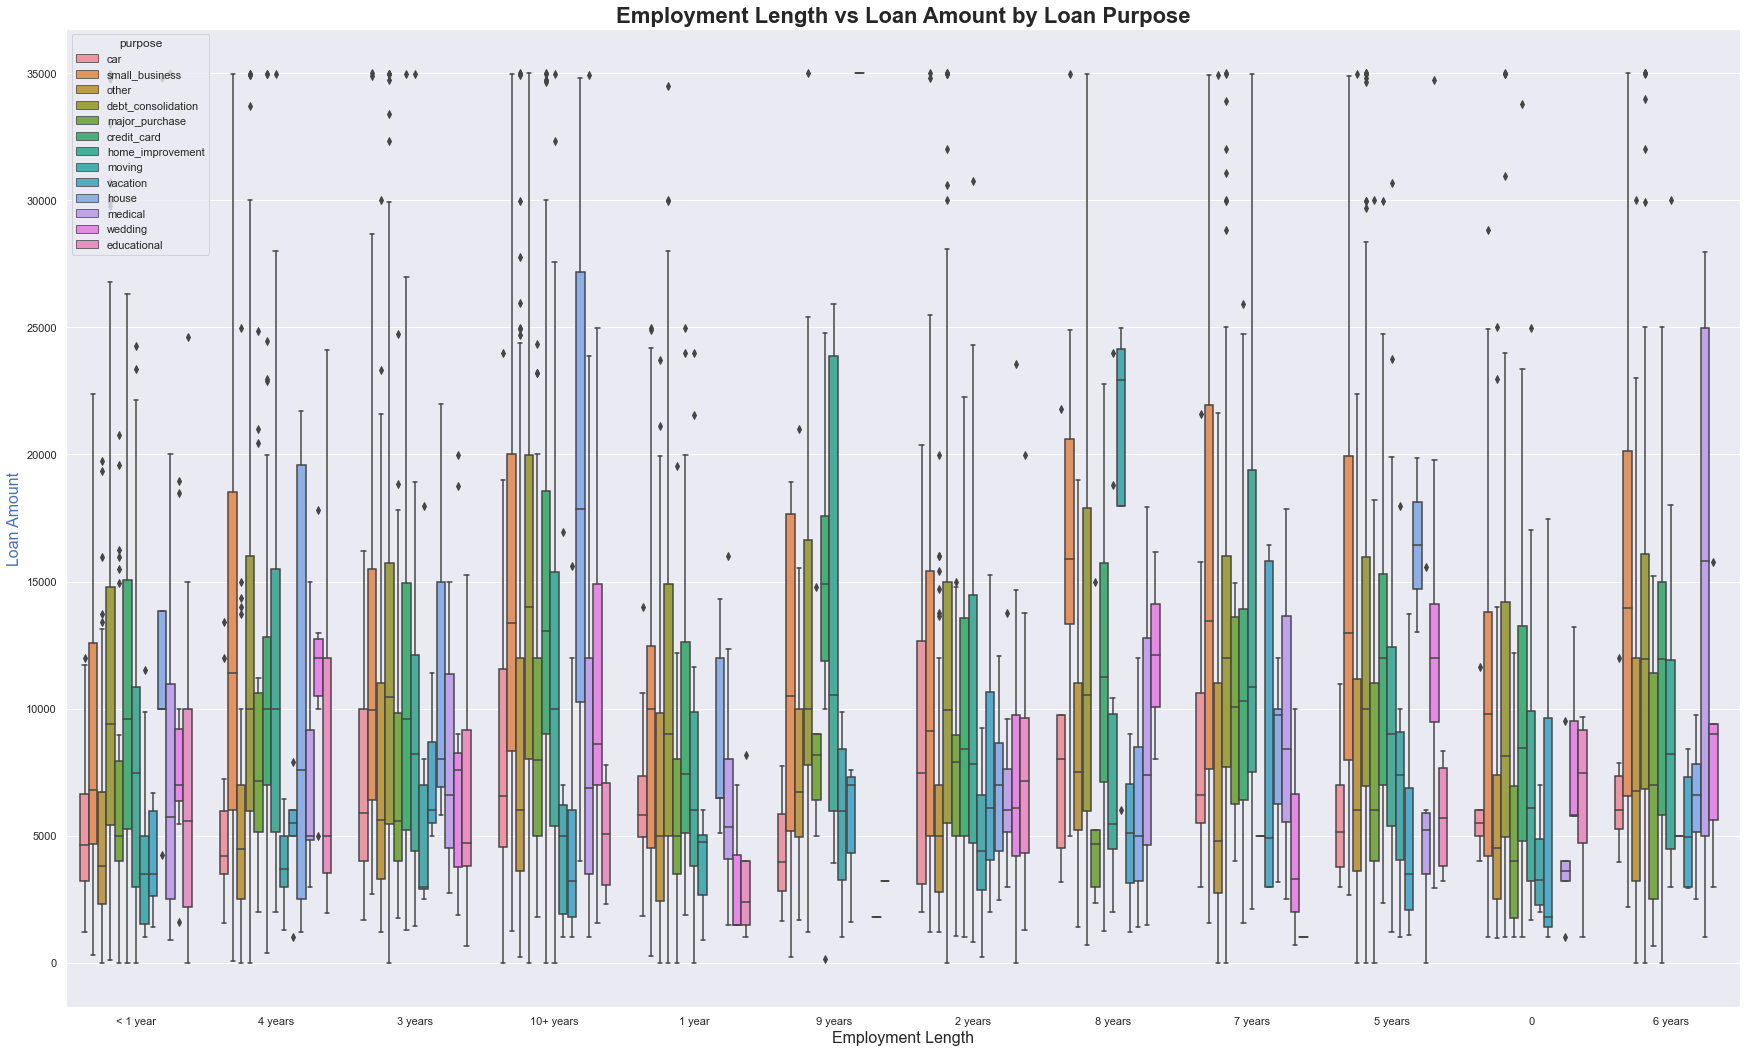

In [453]:
#Plotting the chargedoff loans by Purpose, emp_length, loan_amnt

ax = plt.figure(figsize=(30, 18))
ax = sns.boxplot(x='emp_length',y='funded_amnt_inv',hue='purpose',data=loanstatus)
ax.set_title('Employment Length vs Loan Amount by Loan Purpose',fontsize=22,weight="bold")
ax.set_xlabel('Employment Length',fontsize=16)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=16)
plt.show()

##### Finding: The figure above shows the relationship of emp_length, loan purpose and loan_amnt for charted_off loans.  We find that 10+ years Emp_length category have the highest variance of loan amount extended against the mean loan_amnt in the box plot.

To carry out Cross-Tabulations of two variables, we first define a crosstab function so that we can use this function to repeat this analysis for multiple combination of two variables.

#### Loan Amount, Status by Loan Purpose

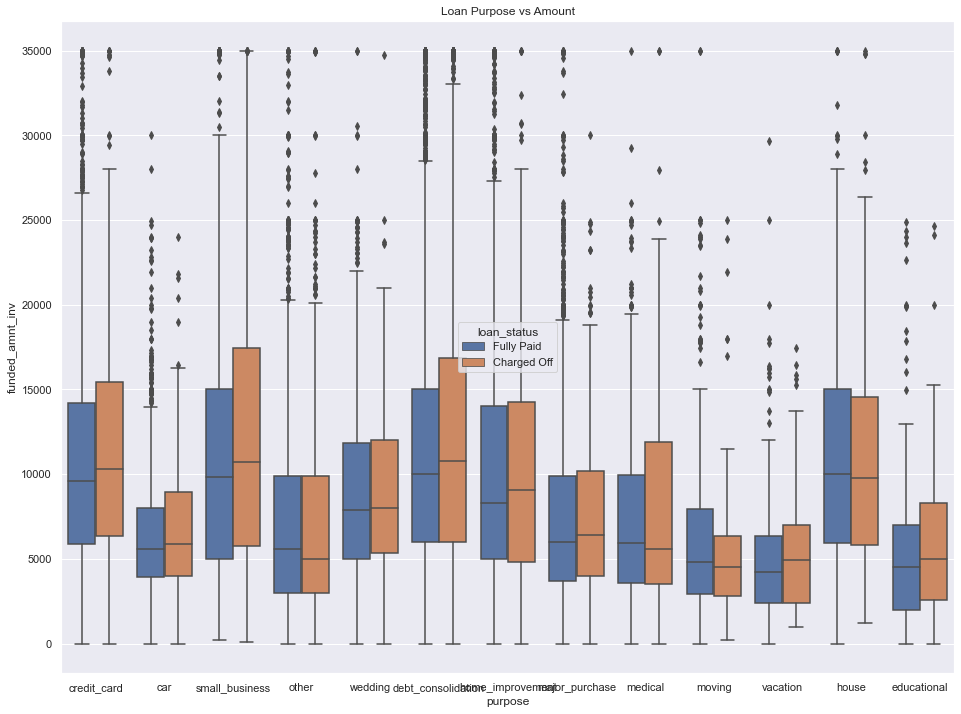

In [454]:
plt.figure(figsize=(16,12))
sns.boxplot(data =loan, x='purpose', y='funded_amnt_inv', hue ='loan_status')
plt.title('Loan Purpose vs Amount')
plt.show()

##### Finding: The figure above shows typical loan_amnt_range for various loan purpose.

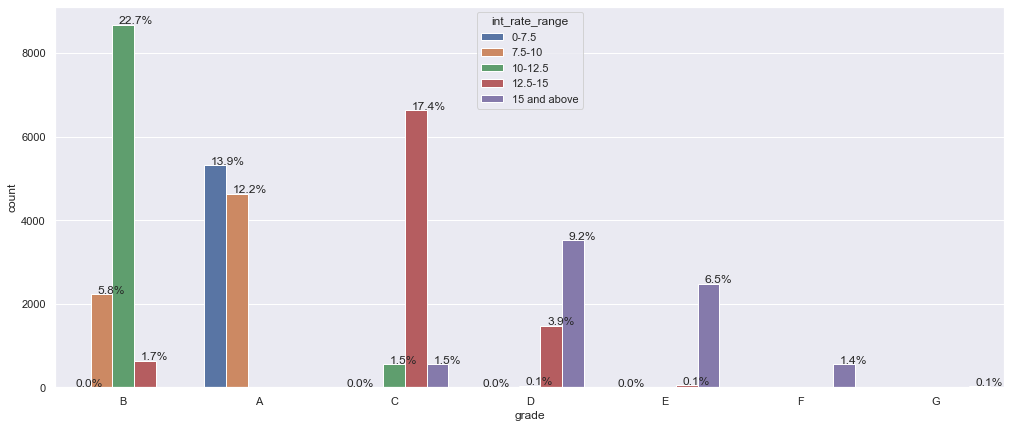

In [455]:
univariate(df=loan,col='grade',vartype=1, hue = 'int_rate_range')


##### Finding: The highest grades D,E and F have the highest interest rate 15+.

#### Cross-Tabulations - Defining a Cross-Tab Function

In [456]:
#Define the Crosstab function
#The crosstab function has two attributes - df name and column name
#The crosstab function returns a cross-tabulation of probability matrix 

def crosstab(df, col):
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

#### Using Cross-Tabulations to define the bi-variate probability distribution function

We would use the Cross-Tabulations to define the probability of loan defaulters (loan_status = 'charge off')
For this we first define a function for caulating bi-variate probability distribution

In [457]:
#Define a bivariate_prob distribution function
#This function has attributes 
    #df: dataframe name
    #col:name of column
    #stacked:True or False to create a Stcked or Non_stacked bar chart 

def bivariate_prob(df,col,stacked= True):
    plotCrosstab = crosstab(df,col)
    
    linePlot = plotCrosstab[['Probability_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Prob Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Prob of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('# of Applicants',color = 'g',fontsize=14)
    plt.show()

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
addr_state,,,,
NJ,277,1493,1770,0.1560
NM,30,151,181,0.1660
NV,107,367,474,0.2260
NY,489,3169,3658,0.1340
OH,153,1020,1173,0.1300
OK,40,247,287,0.1390
OR,71,361,432,0.1640
PA,177,1284,1461,0.1210
RI,25,166,191,0.1310


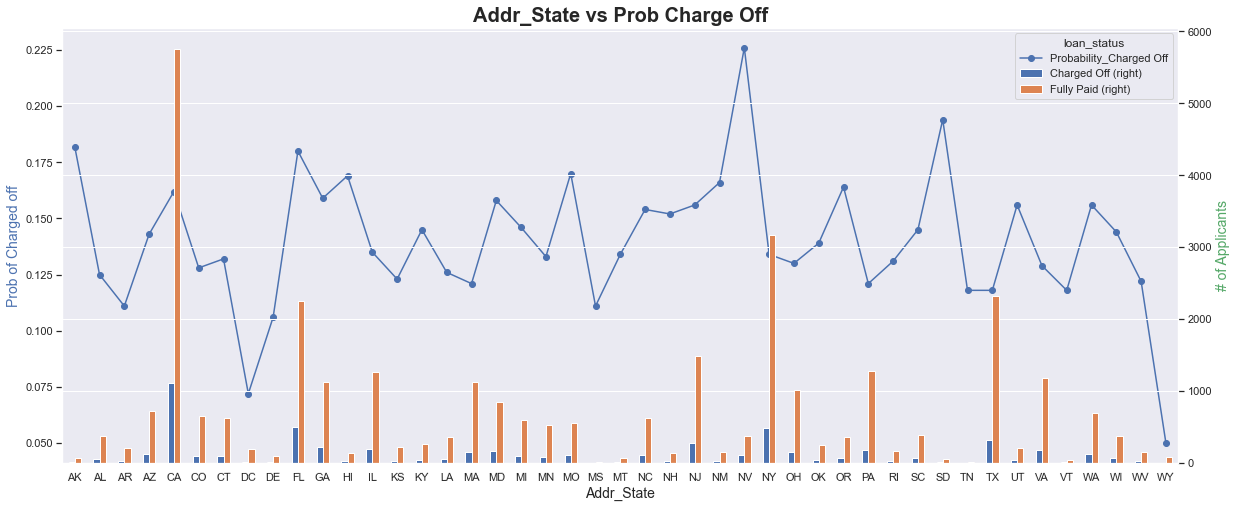

In [458]:
#Now Cross_tabulate and plot the probability of charged_off by State

states = crosstab(loan,'addr_state')
display(states.tail(20))
bivariate_prob(df =loan,col ='addr_state', stacked=False)

##### Finding: Probabity of Charge_off is the highest in state of Nevada (NV) and amount charged off is the highest in the state of California.

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
purpose,,,,
car,159,1336,1495,0.1060
credit_card,538,4454,4992,0.1080
debt_consolidation,2752,15168,17920,0.1540
educational,56,265,321,0.1740
home_improvement,338,2479,2817,0.1200
house,59,301,360,0.1640
major_purchase,220,1912,2132,0.1030
medical,106,567,673,0.1580
moving,90,480,570,0.1580


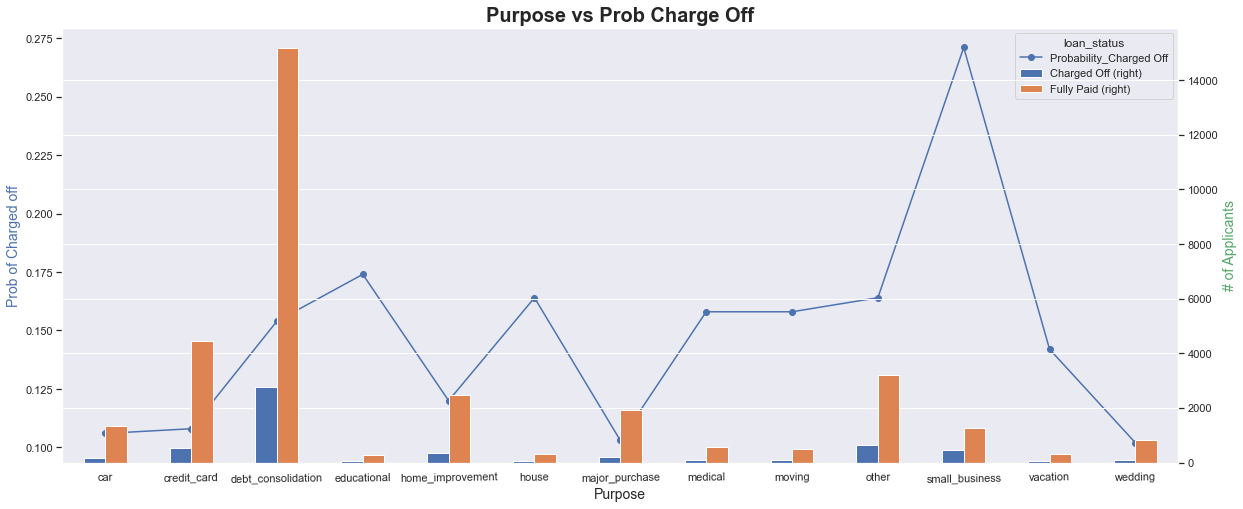

In [459]:
#Cross-Tab and plot the Loan Purpose vs Charged_off Probability

purpose = crosstab(loan,'purpose')
display(purpose)

bivariate_prob(df =loan,col ='purpose',stacked=False)

##### Finding: Highest Charge_off have happened for debt_consolidation purpose loans, and highest probability of the charge-off is for loans taken for small_business purpose.

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
grade,,,,
A,595,9357,9952,0.0600
B,1405,10138,11543,0.1220
C,1335,6410,7745,0.1720
D,1108,3917,5025,0.2200
E,708,1911,2619,0.2700
F,314,645,959,0.3270
G,97,191,288,0.3370


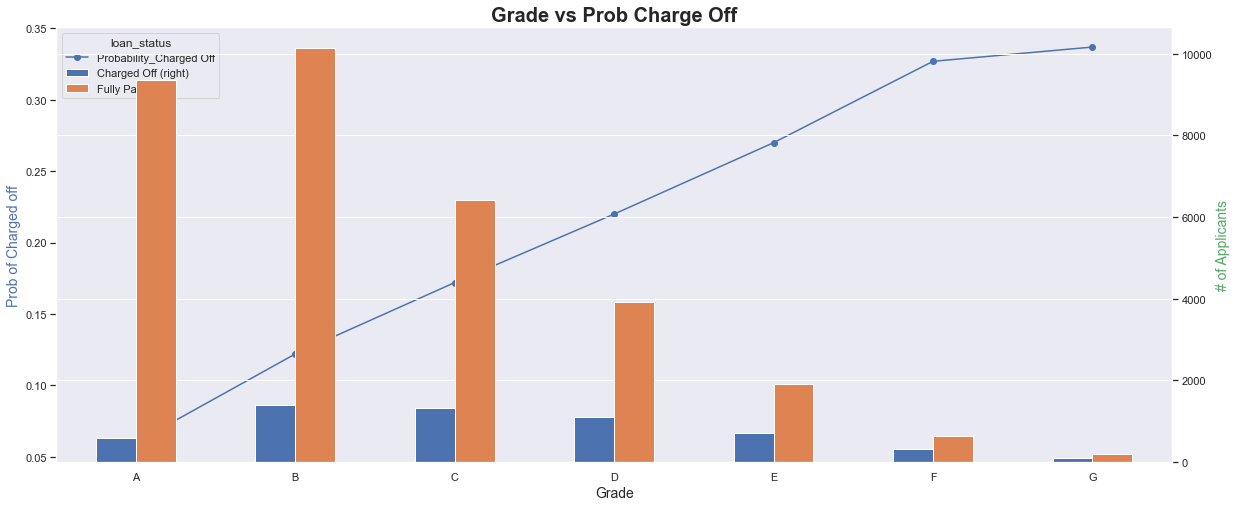

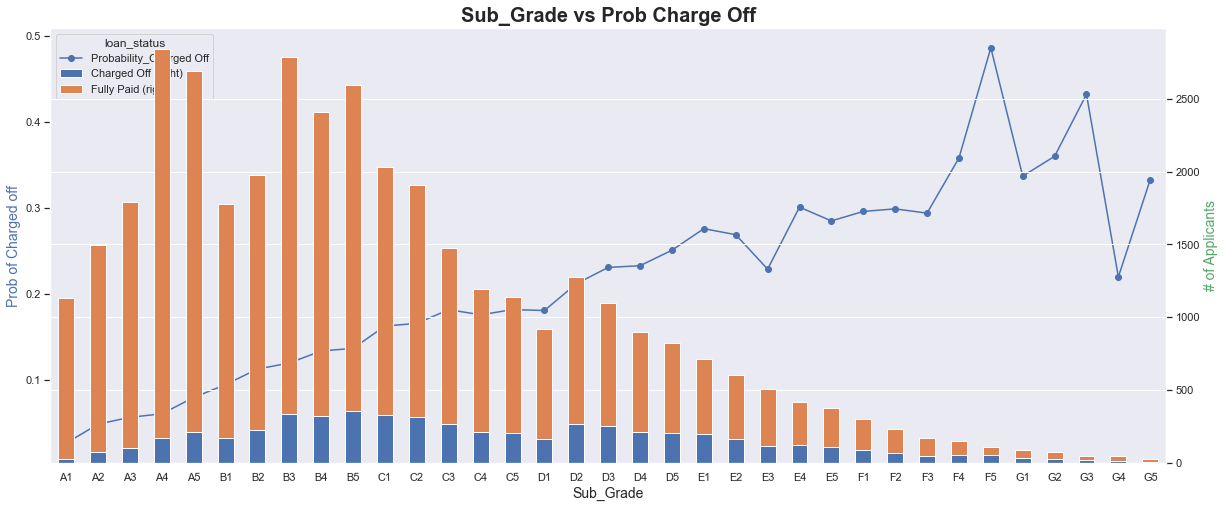

In [460]:
#Cross-tab and plot the loan grade and probability of charge_off
grade = crosstab(loan,'grade')
display(grade)

bivariate_prob(df =loan,col ='grade',stacked=False)
bivariate_prob(df =loan,col ='sub_grade')

##### Finding: Probability of charge_off is the highest for Grade G loans (31.8%).  When analyzed by sub-grade, the highest probability of charge-of is in the loans with grade F5.

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
annual_inc_range,,,,
0-25000,484,2041,2525,0.1920
25000-50000,2108,10653,12761,0.1650
50000-75000,1675,9935,11610,0.1440
75000-100000,730,5271,6001,0.1220
100000 and above,565,4669,5234,0.1080


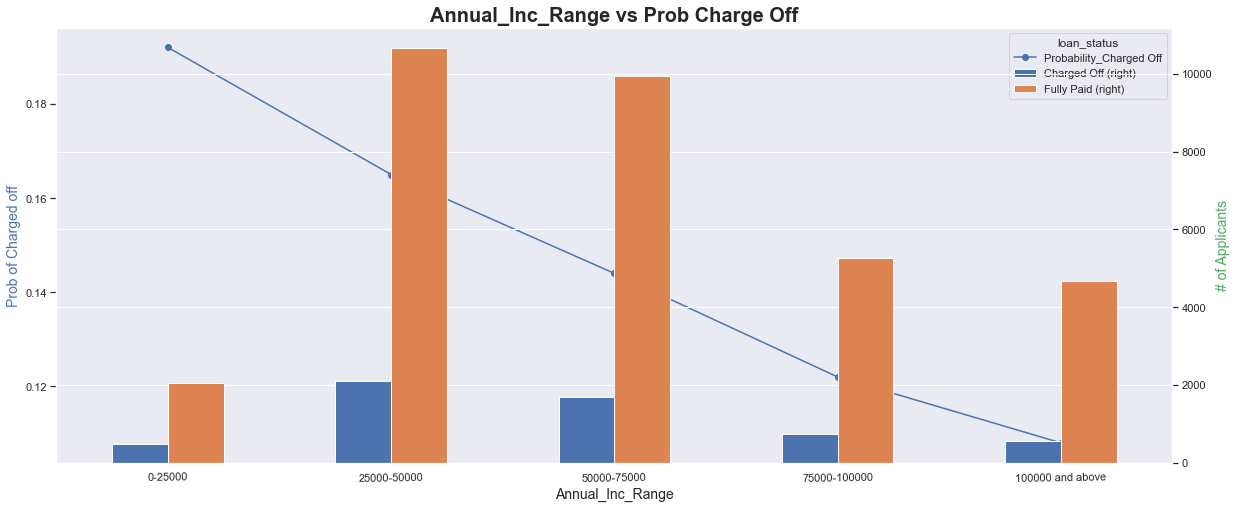

In [461]:
#Cross-tab and plot the annual_income_range and probability of charge_off
annual_inc_range = crosstab(loan,'annual_inc_range')
display(annual_inc_range)

bivariate_prob(df =loan,col ='annual_inc_range', stacked = False)

##### Finding: Highest amount charged_off has been for the loans in the annual_inc_range of  USD25000-50000.  The highest probability of charge_off is for the loans in the category of annual_inc_range USD 0-25000 (19%).

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
int_rate_range,,,,
0-7.5,253,5080,5333,0.0470
7.5-10,566,6292,6858,0.0830
10-12.5,1214,8051,9265,0.1310
12.5-15,1461,7330,8791,0.1660
15 and above,1778,5356,7134,0.2490


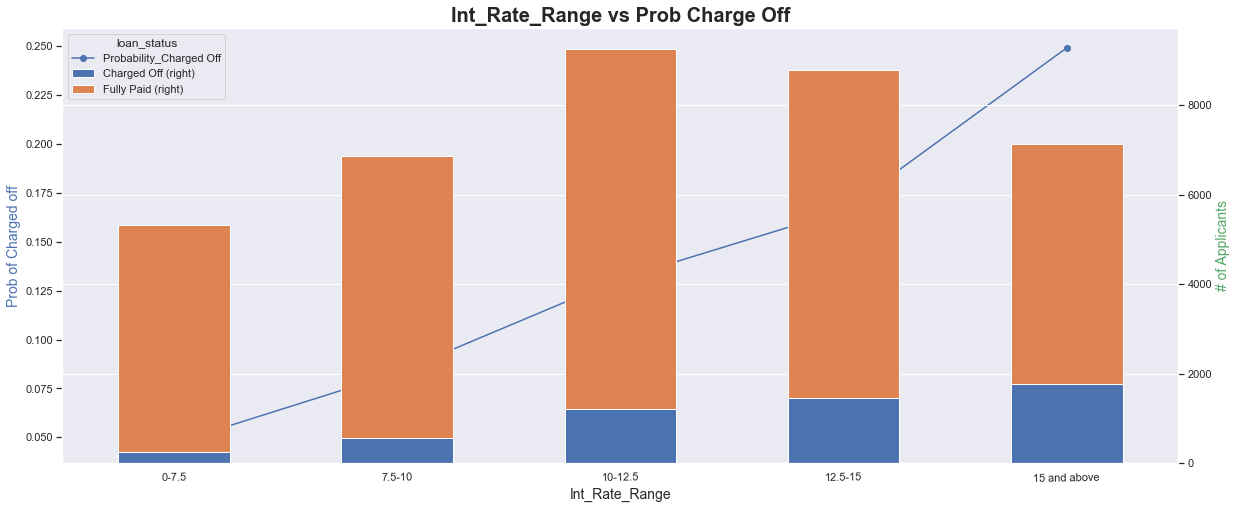

In [462]:
#Cross-tab and plot the interest rate range and probability of charge_off
int_rate_range = crosstab(loan,'int_rate_range')
display(int_rate_range)

bivariate_prob(df =loan,col ='int_rate_range')

##### Finding: Amount Charged_off as well as probability of charge_off is the highest for the int_rate_range of 15%+ 

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
emp_length,,,,
0,226,796,1022,0.2210
1 year,448,2677,3125,0.1430
10+ years,1313,7046,8359,0.1570
2 years,562,3692,4254,0.1320
3 years,546,3423,3969,0.1380
4 years,455,2856,3311,0.1370
5 years,455,2711,3166,0.1440
6 years,305,1843,2148,0.1420
7 years,259,1430,1689,0.1530


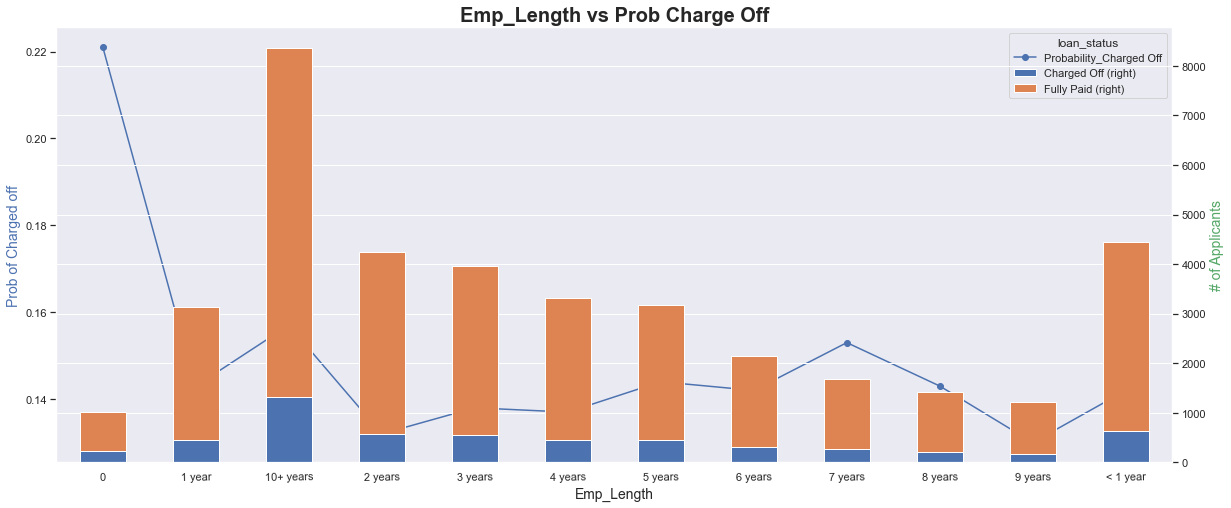

In [463]:
#Cross-tab and plot the emp_length and probability of charge_off
emp_length = crosstab(loan,'emp_length')
display(emp_length)

bivariate_prob(df =loan,col ='emp_length')

##### Finding: Probability of charge_off (22.1%) is the highest among low employment length.  

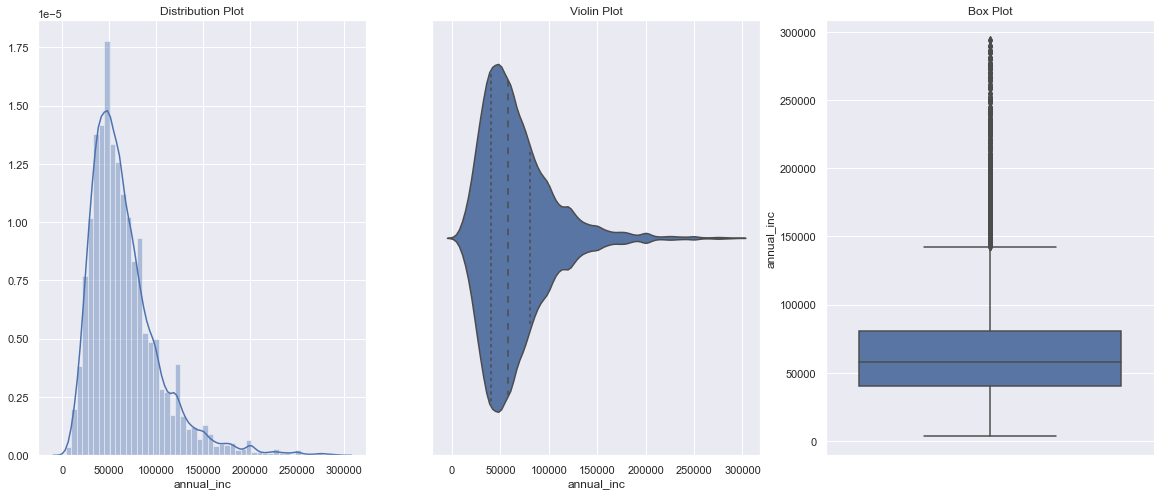

In [464]:
univariate(df=loan,col='annual_inc',vartype=0)

In [465]:
#As we know if employee having income between USD25000 and USD USD50000, there is high chance of defaulting the loan 
#Now we can calculate the probability of employee having annual income between USD25000 and 50000.
loan.annual_inc.describe()

count    38131.0000
mean     66170.1688
std      37311.7582
min       4000.0000
25%      40000.0000
50%      58000.0000
75%      81000.0000
max     294000.0000
Name: annual_inc, dtype: float64

# Conclusions

#### (Section 1-3) Key Highlights of the loan dataset 

- loan dataset carried 39717 rows and 111 columns
- After required cleaning and removing not required data, we have reduced the dataset to 39265 rows and 40 columns to carry out further analysis.

#### (Section 4) We have added 6 derived variables. 
- These include loan_income_ratio, issue_month, issue_year, loan_amnt_range, annual_inc_range, int_rate_range.  Our univariate, correlation, and multi-variate analysis is based on this dataset carrying 38131 rows and 46 columns.
- We have dropped the loans having status as Current because, these candidates are not labelled as 'defaulted‘.

#### (Section 5) Univariate and Segmented Univariate Analysis Highlights
- The largest number of loans (12650 out of 38131, 32.8%) are in the range of USD 5000-10000. 
- The largest number of loans (9265 out of total 38131 loans, 24.3%) are in the interest rate bracket of 10-12.5 percent. The percentage defaulters are the highest in interest rate range of 15% and above. 
- The largest number of loans  (12761 out of total 38131 loans, 33.3%) are extended to people with Rs 25000-50000 annual income bracket. The largest % defaulters 5.5% also belong to this bracket
- 32569 out of 38131 loans (85.4%) are fully paid, 5562 (14.6%) are charged_off . Charged_off cases (5.4%) are the highest in annual_inc_range of USD25000-50000.
- Largest category of loans is to Loan amount range USD5000-10000, and the highest incidence of default is also among this group (4.2% of overall loans).
- Debt Consolidation emerges as topmost purpose for taking loan and appears are topmost category for charged_off loans.
- The highest instances of loans issued (18380 out of 38131, 40.8%) are to people with home_ownership as "Rent". The default (7.4% of all loans) is also the highest in this group.
- The charged_off instances percentage have gone up in recent years, specifically year 2011.
- 75.4% loans are extended for 36 months. The charged-off proportion is higher for 60 month tenure.
- Most of the loans(10.9%) are issued in the month of December, The default (1.8%% of all loans) is also the highest in this December month loans.

#### Correlation Analysis and Heatmap
- High correlation is found amongst Loan_Amnt, Funded_amnt, funded_amnt_inv, and installment amount are highly correlated. We therefore kept our analysis to Loan_amnt and not for other correlated variables.
- annual_income and loan_income_ratio are negatively correlated.  Hence using annual_inc_range is a good predictor.

#### Bi-Variate Analysis

- 10+ years Emp_length category have the highest variance of loan amount extended against the mean loan_amnt in the box plot.
- The highest grades D,E and F have the highest interest rate 15+.
- Probabity of Charge_off is the highest in state of Nevada (NV) and amount charged off is the highest in the state of California.
- The highest charge-off have happened for debt_consolidation purpose loans, and highest probability of the charge-off is for loans taken for small_business purpose.
- Probability of charge_off is the highest for Grade G loans (31.8%).  When analyzed by sub-grade, the highest probability of charge-of is in the loans with grade F5.
- The highest amount charged_off has been for the loans in the annual_inc_range of  USD25000-50000.  The highest probability of charge_off is for the loans in the category of annual_inc_range USD 0-25000 (19%)
- Amount Charged_off as well as probability of charge_off is the highest for the int_rate_range of 15%
- Probability of charge_off (22.1%) is the highest among low employment length.